##  Implementing Uniform Cost Search (UCS).
Uniform Cost Search (UCS) is a graph search algorithm used to find the shortest path in a weighted graph. Unlike Breadth-First Search (BFS), which explores all neighboring nodes equally, UCS selects the node with the lowest total cost from the start node. This makes UCS optimal for finding the shortest path.

### Algorithm

1. Initialize an empty priority queue with (cost, node, path) tuples, where:
   * `cost` is the total cost from the start node to the current node,
   * `node` is the current node being explored,
   * `path` is the path from the start node to the current node.

2. Add the start node to the priority queue with a cost of 0.

3. While the priority queue is not empty:
    * Pop the node with the lowest total cost from the priority queue.
    * If the current node is the goal node, return the path and its cost.
    * Otherwise, mark the current node as visited and explore its neighbors.
    * For each neighbor:
        * If the neighbor has not been visited:
            * Calculate the total cost to reach the neighbor node.
            * Add the neighbor node to the priority queue with the new total cost and update the path.

4. If no path is found, return None.


In [3]:
import heapq

def uniform_cost_search(graph, start, goal):
    opened = [(0, start, [start])]  # Priority queue with (cost, node, path)
    closed = set()

    while opened:
        cost, current, path = heapq.heappop(opened)
        if current == goal:
            return path, cost  # Return both path and its cost

        if current not in closed:
            closed.add(current)
            for child, child_cost in graph[current].items():
                if child not in closed:
                    heapq.heappush(opened, (cost + child_cost, child, path + 
                                            [child]))

    return None, float('inf') #No path found, return None for path and infinite cost


Now, let's define a graph and use the uniform_cost_search function to find the optimal path from node 'A' to node 'E'.

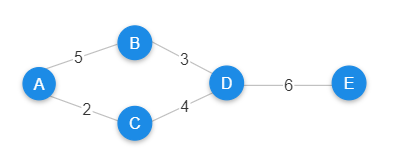

In [4]:
graph = {
    'A': {'B': 5, 'C': 2},
    'B': {'D': 2},
    'C': {'D': 4},
    'D': {'E': 6}
}

# Define the start and goal nodes
start_node = 'A'
goal_node = 'E'

# Perform uniform cost search
result_path, path_cost = uniform_cost_search(graph, start_node, goal_node)

# Output the result
if result_path:
    print("Optimal path:", result_path)
    print("Path cost:", path_cost)
else:
    print("No path found.")

Optimal path: ['A', 'C', 'D', 'E']
Path cost: 12
